# Logistic Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

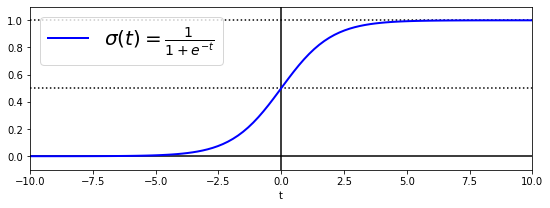

In [2]:
t = np.linspace(-10, 10, 100)   # -10에서 10사이를 균일하게 100개로 나눈 후 각 값을 가지는 array 생성, 식에 t를 대입해 그래프를 그리기 위한 메소드
sig = 1 / (1 + np.exp(-t))   # sigmoid 식 설정, 그래프 그릴 때 사용
plt.figure(figsize=(9, 3))   # figure 설정, 크기는 9x3 으로 설정
plt.plot([-10, 10], [0, 0], "k-")   # 맨 아래 검은 실선 그리기, 'k-'는 검은 실선을 의미 
plt.plot([-10, 10], [0.5, 0.5], "k:")   # 중간 검은 점선 그리기, 'k:'는 검은 점선을 의미 
plt.plot([-10, 10], [1, 1], "k:")   #맨 위 검은 점선 그리기
plt.plot([0, 0], [-1.1, 1.1], "k-")   # 가운데 세로 실선 그리기
plt.plot(t, sig, "b-", linewidth=2, label=r"$\sigma(t) = \frac{1}{1 + e^{-t}}$")   # sigmoid 그래프 그리기. t를 x로, t를 넣어 sigmoid를 계산한 값을 y로 사용, r""을 사용해 latex문법 사용하여 식 표현
plt.xlabel("t")   # 가로축 이름 t로 설정
plt.legend(loc="upper left", fontsize=20)   # 범례표시, loc 매개변수를 통해 왼쪽위에 위치, 글씨 크기 20 설정
plt.axis([-10, 10, -0.1, 1.1])   #x, y축의 범위 설정, []안 순서대로 x축 시작, x축 끝, y축 시작, y축 끝
plt.show()   # plot 출력

**식 4-16: 하나의 훈련 샘플에 대한 비용 함수**

$
c(\boldsymbol{\theta}) =
\begin{cases}
  -\log(\hat{p}) & \text{if } y = 1, \\
  -\log(1 - \hat{p}) & \text{if } y = 0.
\end{cases}
$


**식 4-17: 로지스틱 회귀 비용 함수(로그 손실)**

$
J(\boldsymbol{\theta}) = -\dfrac{1}{m} \sum\limits_{i=1}^{m}{\left[ y^{(i)} log\left(\hat{p}^{(i)}\right) + (1 - y^{(i)}) log\left(1 - \hat{p}^{(i)}\right)\right]}
$


**식 4-18: 로지스틱 비용 함수의 편도 함수**

$
\dfrac{\partial}{\partial \theta_j} \text{J}(\boldsymbol{\theta}) = \dfrac{1}{m}\sum\limits_{i=1}^{m}\left(\mathbf{\sigma(\boldsymbol{\theta}}^T \mathbf{x}^{(i)}) - y^{(i)}\right)\, x_j^{(i)}
$

In [3]:
from sklearn import datasets   # iris data 사용을 위한 sklearn datasets import
iris = datasets.load_iris()   # iris data를 iris 변수에 저장
list(iris.keys())   # 이때 iris 내부의 key값 출력

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename']

- data : 내부 target을 제외한 data, 2차원 array
- target : target 변수값, 1차원 array
- frame : ??
- target_names : target의 각 값이 어떤 내용을 의미하는지
- DESCR : data에 대한 전체적인 정보
- feature_names : data의 column의 이름, 즉 각 변수가 무엇을 의미하는지
- filename : data 저장된 파일 path

In [4]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [5]:
X = iris["data"][:, 3:]  # 꽃잎 너비
y = (iris["target"] == 2).astype(np.int64)  # Iris virginica이면 1 아니면 0

**노트**: 향후 버전이 바뀌더라도 동일한 결과를 만들기 위해 사이킷런 0.22 버전의 기본값인 `solver="lbfgs"`로 지정합니다.

In [6]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver="lbfgs", random_state=42)   #LogisticRegression 객체 생성, lbfgs는 최적화 알고리즘의 한 종류
log_reg.fit(X, y)   # training

LogisticRegression(random_state=42)

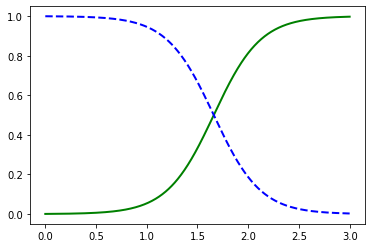

In [7]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)   # 그래프 그리기 위해 0~3을 1000개로 나누기, 아래 코드에서 사용하기 위해 한줄로 reshape
y_proba = log_reg.predict_proba(X_new) # 너비에 따른 예상 확률 y_proba로 출력

plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica")   # virginica일 확률, 초록색 실선으로 표현
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica")   # virginica가 아닐 확률, 파란색 점선으로 표현

책에 실린 그림은 조금 더 예쁘게 꾸몄습니다:

C:\Users\MINHO\anaconda3\envs\multi\lib\site-packages\matplotlib\patches.py:1387: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  verts = np.dot(coords, M) + (x + dx, y + dy)


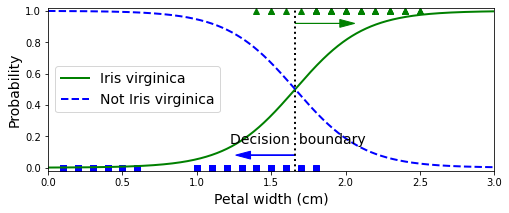

In [8]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]   # 확률이 0.5 이상인 값 중 최솟값 저장, 즉 0.5 이상인 값 중 최소값

plt.figure(figsize=(8, 3))   # figure size 지정
plt.plot(X[y==0], y[y==0], "bs")   # y가 0, 즉 virginica가 아닌 데이터의 petal width 확인 위해 파란색 사각형으로 표시
plt.plot(X[y==1], y[y==1], "g^")   # y가 1, 즉 virginica인 데이터의 petal width 확인을 위해 초록색 삼각형으로 표시
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)   # boundary값 검은색 점선으로 표시, (1.6, -1) 부터 (1.6, 2)까지
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica")   # virginica 일 확률 초록색 실선 표시
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica")   # virginica 아닐 확률 파란색 점선 표시
plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")   # Decision boundary 글씨 표시, (decision_boundary+0.02, 0.15)를 중심으로 검은색글씨 font size 14
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')   # (decision_boundary, 0.08)부터 (decision_boundary + -0.3, 0.08 + 0) 까지의 화살표 그리기. fc = facecolor(내부색깔), ec=edgecolor(경계선색깔)
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')   # (decision_boundary, 0.92)부터 (decision_boundary + 0.3, 0.92 + 0) 까지의 화살표 그리기. fc = facecolor(내부색깔), ec=edgecolor(경계선색깔)
plt.xlabel("Petal width (cm)", fontsize=14)   # x label 표시
plt.ylabel("Probability", fontsize=14)   # y label 표시
plt.legend(loc="center left", fontsize=14)   # 범례표시, 왼쪽 중앙
plt.axis([0, 3, -0.02, 1.02])   # 축 표시, x : 0~3, y:-0.02~1.02
plt.show()


In [9]:
log_reg.predict([[1.7], [1.5]])   # petal width가 1.7, 1.5인 경우 확률에 따라 각 virginica, not virginica라고 예측함

array([1, 0], dtype=int64)

In [10]:
from sklearn.linear_model import LogisticRegression

X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.int64)  # target이 virginica인지 아닌지를 1과 0으로 표시하기 위해 int로 변경

log_reg = LogisticRegression(solver="lbfgs", C=10**10, random_state=42)
log_reg.fit(X, y)

LogisticRegression(C=10000000000, random_state=42)

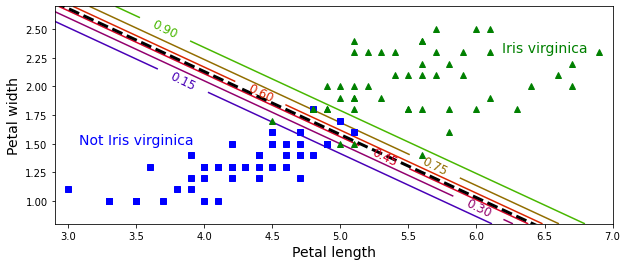

In [11]:
x0, x1 = np.meshgrid(  
        np.linspace(2.9, 7, 500).reshape(-1, 1),   #---'1'
        np.linspace(0.8, 2.7, 200).reshape(-1, 1), #---'2'
    )                                                 # 격자 생성, x0 : 2.9~7을 500개로 나눈 값을 한줄로 나열하여 (200, 500)의 배열생성,
                                                      # 이때 x0에는 행마다 '1'의 내용이 반복, x1에는 열마다 '2'의 내용이 반복
X_new = np.c_[x0.ravel(), x1.ravel()]   # x0, x1을 1차원으로 풀어서 옆으로 붙이기. 즉 500*200 = 100000개의 1차원 2개가 세로로 붙어서 100000x2의 배열 완성 -> 각 값이 전체 plot의 좌표를 나타낸다.

y_proba = log_reg.predict_proba(X_new)   # plot 위 100000개의 좌표에 대해 예상한 결과를 저장

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")   # X에서 y가 0인 index의 값들을 파란색 사각형으로 표시
plt.plot(X[y==1, 0], X[y==1, 1], "g^")   # X에서 y가 1인 index의 값들을 초록색 삼각형으로 표시

left_right = np.array([2.9, 7])   # 그림에서 표시할 가장 왼쪽과 오른족의 x값 저장
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]   # 맨 왼쪽과 오른쪽의 x값에 따른 y값 구하기.

zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.5, "Not Iris virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])
plt.show()

In [12]:
log_reg.coef_[0][0] / log_reg.coef_[0][1] * left_right

array([1.59743574, 3.85587938])

In [13]:
log_reg.intercept_

array([-45.27248302])

In [14]:
boundary

array([2.7361817 , 0.47773807])

In [15]:
y_proba[:, 1]

array([1.64270002e-09, 1.72223501e-09, 1.80562087e-09, ...,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00])

**식 4-20: 소프트맥스 함수**

$
\hat{p}_k = \sigma\left(\mathbf{s}(\mathbf{x})\right)_k = \dfrac{\exp\left(s_k(\mathbf{x})\right)}{\sum\limits_{j=1}^{K}{\exp\left(s_j(\mathbf{x})\right)}}
$

**식 4-22: 크로스 엔트로피 비용 함수**

$
J(\boldsymbol{\Theta}) = - \dfrac{1}{m}\sum\limits_{i=1}^{m}\sum\limits_{k=1}^{K}{y_k^{(i)}\log\left(\hat{p}_k^{(i)}\right)}
$

**식 4-23: 클래스 k에 대한 크로스 엔트로피의 그레이디언트 벡터**

$
\nabla_{\boldsymbol{\theta}^{(k)}} \, J(\boldsymbol{\Theta}) = \dfrac{1}{m} \sum\limits_{i=1}^{m}{ \left ( \hat{p}^{(i)}_k - y_k^{(i)} \right ) \mathbf{x}^{(i)}}
$

In [16]:
X = iris["data"][:, (2, 3)]  # 꽃잎 길이, 꽃잎 너비
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10, random_state=42)
softmax_reg.fit(X, y)

LogisticRegression(C=10, multi_class='multinomial', random_state=42)

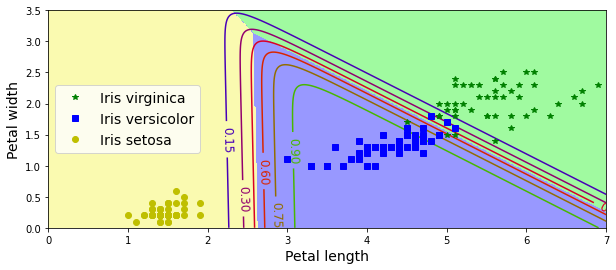

In [17]:
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]


y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g*", label="Iris virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])   # 면적 채우는 색 결정

plt.contourf(x0, x1, zz, cmap=custom_cmap)   # 구역 나눠서 색 채우기
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)   # 경계선 등고선
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
plt.show()

In [18]:
X[y==2, 0]

array([6. , 5.1, 5.9, 5.6, 5.8, 6.6, 4.5, 6.3, 5.8, 6.1, 5.1, 5.3, 5.5,
       5. , 5.1, 5.3, 5.5, 6.7, 6.9, 5. , 5.7, 4.9, 6.7, 4.9, 5.7, 6. ,
       4.8, 4.9, 5.6, 5.8, 6.1, 6.4, 5.6, 5.1, 5.6, 6.1, 5.6, 5.5, 4.8,
       5.4, 5.6, 5.1, 5.1, 5.9, 5.7, 5.2, 5. , 5.2, 5.4, 5.1])

In [19]:
softmax_reg.predict_proba([[2.6, 3.1]])

array([[0.33299228, 0.37074148, 0.29626624]])

In [20]:
softmax_reg.predict([[5, 2]])

array([2])

In [21]:
softmax_reg.predict([[1, 1]])

array([0])

In [22]:
softmax_reg.predict_proba([[5, 2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])

In [23]:
softmax_reg.predict_proba([[5, 2]]).sum()

1.0